In [52]:
import torchvision.models.detection
import torch
from torchvision import transforms as T
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Pre-trained model Faster-RCNN

In [53]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
# For training
images, boxes = torch.rand(4, 3, 600, 1200), torch.rand(4, 11, 4)
labels = torch.randint(1, 91, (4, 11))
images = list(image for image in images)
targets = []
for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)
 # output = model(images, targets)
 # For inference
    
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

# optionally, if you want to export the model to ONNX:
# torch.onnx.export(model, x, "faster_rcnn.onnx", opset_version = 11)

In [54]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

## Import pics

In [55]:
img1 = Image.open('img/cat.jpg')
img2 = Image.open('img/dog.jpg')

## Checking pre-trained model

In [66]:
def get_prediction(img, threshold):
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

In [78]:
def show_boxes(image, boxes, classes):
    fig, ax = plt.subplots()
    ax.imshow(image)
    x1 = boxes[0][0][0]
    y1 = boxes[0][0][1]
    length = boxes[0][1][0] - x1
    height = boxes[0][1][1] - y1
    rect = patches.Rectangle((x1, y1), length, height, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    plt.show()
    print('Predicted class:', classes[0])

In [79]:
boxes_img1, class_img1 = get_prediction(img1, 0.95)

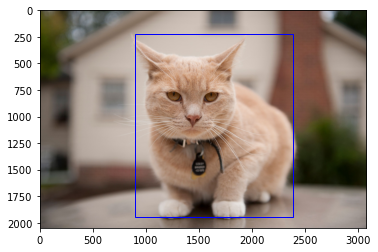

Predicted class: cat


In [80]:
show_boxes(img1, boxes_img1, class_img1)

In [76]:
boxes_img2, class_img2 = get_prediction(img2, 0.95)

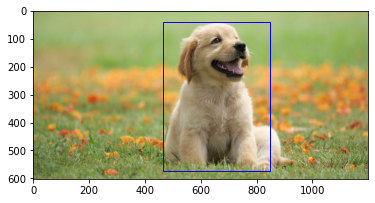

Predicted class: dog


In [81]:
show_boxes(img2, boxes_img2, class_img2)